<a href="https://colab.research.google.com/github/dantrainor9/Breast_Cancer_Diagnostics/blob/main/Breast_Cancer_Diagnostics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [ ]:
path = '/content/drive/MyDrive/Breast cancer diagnostics/WBCdiag_02_withheader.csv'
df = pd.read_csv(path)

#**Beginning of EDA**

In [ ]:
df.head()

,MALIG,Clump_Thick,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhes,Epit_Size,Bare_Nuclei,Bland_Chrom,Norm_Nucleoli,Mitoses
0,-1,5,1,1,1,2,1,3,1,1
1,-1,5,4,4,5,7,10,3,2,1
2,-1,3,1,1,1,2,2,3,1,1
3,-1,6,8,8,1,3,4,3,7,1
4,-1,4,1,1,3,2,1,3,1,1


In [ ]:
df.shape

(683, 10)

In [ ]:
df.describe()

,MALIG,Clump_Thick,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhes,Epit_Size,Bare_Nuclei,Bland_Chrom,Norm_Nucleoli,Mitoses
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,-0.300146,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,0.954592,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,-1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,-1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   MALIG               683 non-null    int64
 1   Clump_Thick         683 non-null    int64
 2   Uniform_Cell_Size   683 non-null    int64
 3   Uniform_Cell_Shape  683 non-null    int64
 4   Marginal_Adhes      683 non-null    int64
 5   Epit_Size           683 non-null    int64
 6   Bare_Nuclei         683 non-null    int64
 7   Bland_Chrom         683 non-null    int64
 8   Norm_Nucleoli       683 non-null    int64
 9   Mitoses             683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [ ]:
df['MALIG'].value_counts()

MALIG
-1    444
 1    239
Name: count, dtype: int64

In [ ]:
#while this dataset is small, the target column has good representation of the positive class.

In [ ]:
#reassigning all -1 values which indicate benign growths as 0
df['MALIG'] = np.where(df['MALIG']<0,0,df['MALIG'])

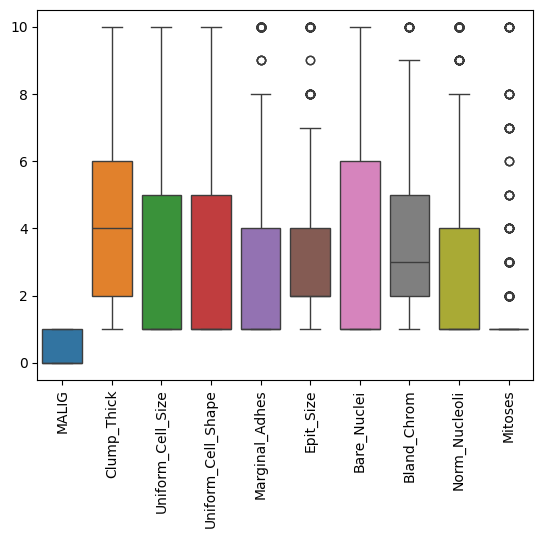

In [ ]:
sns.boxplot(data=df)
plt.xticks(rotation=90);

In [ ]:
#some outliers, but these may still be indicators of malignancy
#also not a lot of variance in some of the feature columns, 6/9 have their minimum, 25%, and 50% at 1

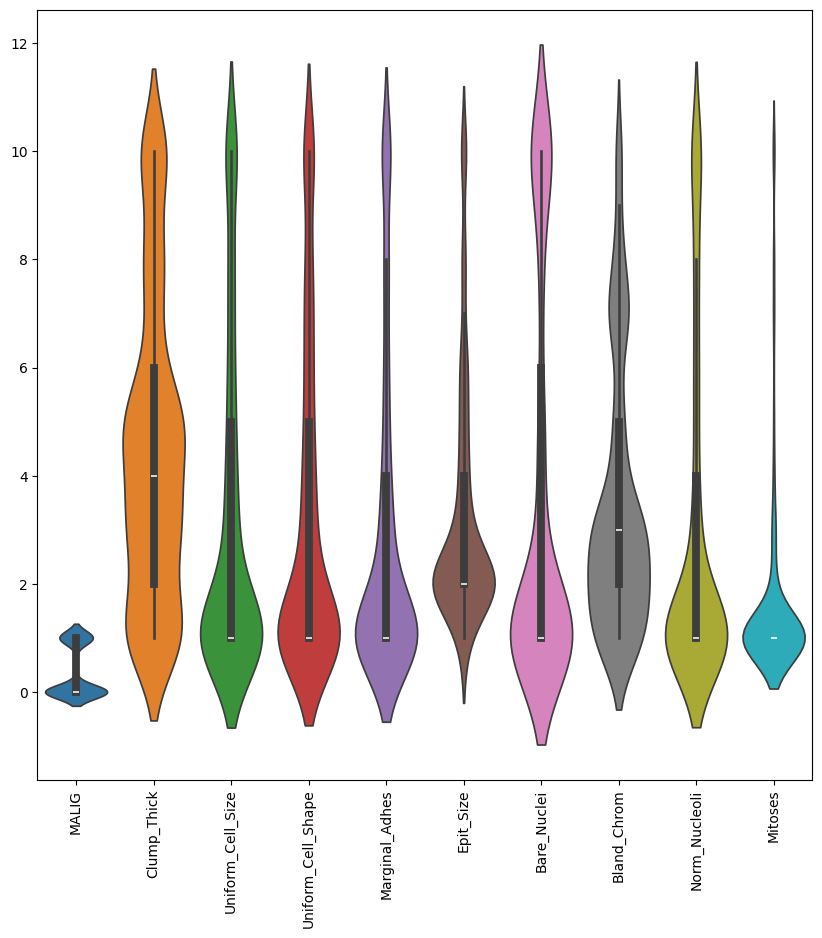

In [ ]:
plt.figure(figsize=(10,10))
sns.violinplot(data=df)
plt.xticks(rotation=90);

In [ ]:
df.duplicated().value_counts()

False    449
True     234
Name: count, dtype: int64

In [ ]:
#lots of individuals with the same data. Interesting how close this is to the target column class split

In [ ]:
corr=df.corr()

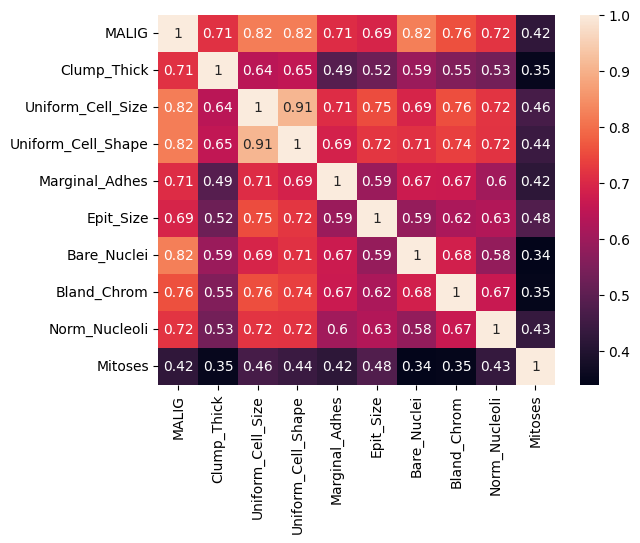

In [ ]:
sns.heatmap(data=corr,annot=True);

In [ ]:
#interesting that cell shape and size have both a very high correlation to each other and to malignancy

In [ ]:
corr2 = df.corr(method='spearman')

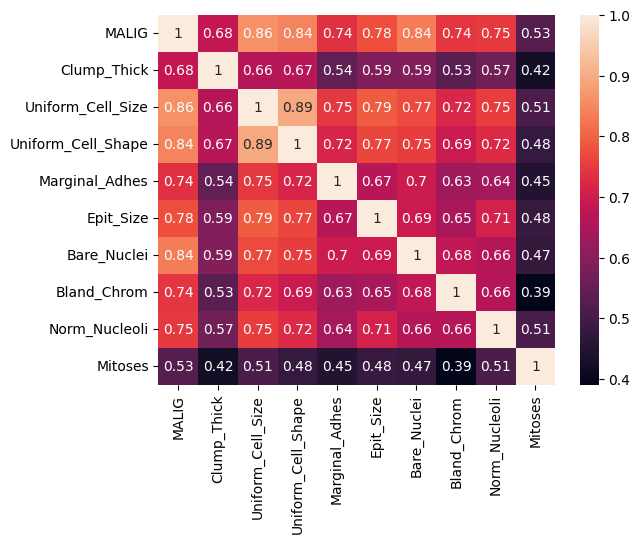

In [ ]:
sns.heatmap(data=corr2,annot=True);

In [ ]:
#based on the boxplots above, I doubt this data is strictly parametric, so I'll rely on the results from Spearman's correlation
#this suggests that cell size, cell shape, and bare nuclei are the best indicators of malignancy

#**Beginning of Clustering Analysis**

In [ ]:
#scaling data for clustering algorithm
scaler = StandardScaler()

In [ ]:
df_scaled = scaler.fit_transform(df)

In [ ]:
#creating a clustering algorithm
kmeans = KMeans(n_clusters=3, max_iter=500)

In [ ]:
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=500, n_clusters=3)

In [ ]:
#visualizing clusters in scatterplots
df['cluster'] = kmeans.labels_

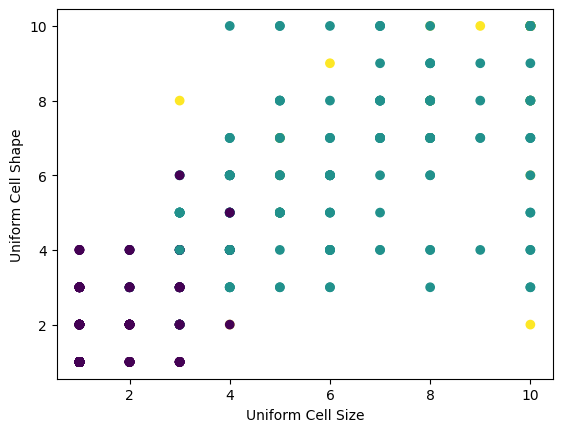

In [ ]:
plt.scatter(df['Uniform_Cell_Size'],df['Uniform_Cell_Shape'],c=df['cluster'])
plt.xlabel('Uniform Cell Size')
plt.ylabel('Uniform Cell Shape');

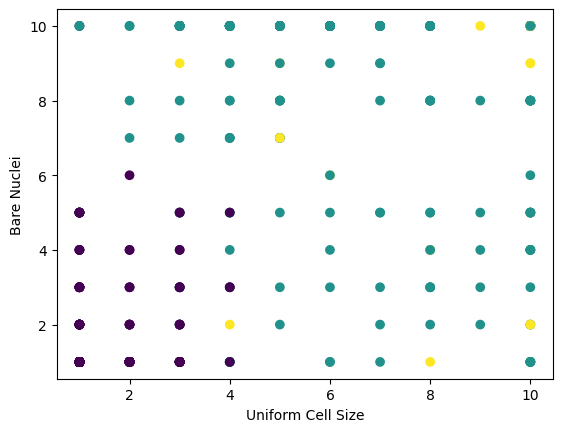

In [ ]:
plt.scatter(df['Uniform_Cell_Size'],df['Bare_Nuclei'],c=df['cluster'])
plt.xlabel('Uniform Cell Size')
plt.ylabel('Bare Nuclei');

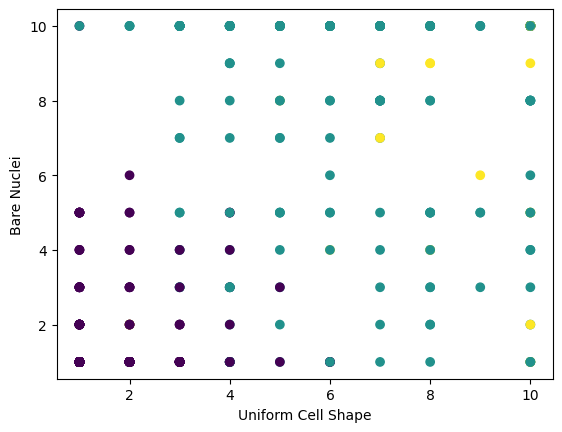

In [ ]:
plt.scatter(df['Uniform_Cell_Shape'],df['Bare_Nuclei'],c=df['cluster'])
plt.xlabel('Uniform Cell Shape')
plt.ylabel('Bare Nuclei');

In [ ]:
#making a function to determine ideal # of clusters
ks = range(2,20)
sil = []
inertias = []

for k in ks:
  km = KMeans(n_clusters=k)
  km.fit(df)
  sil.append(silhouette_score(df, km.labels_))
  inertias.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

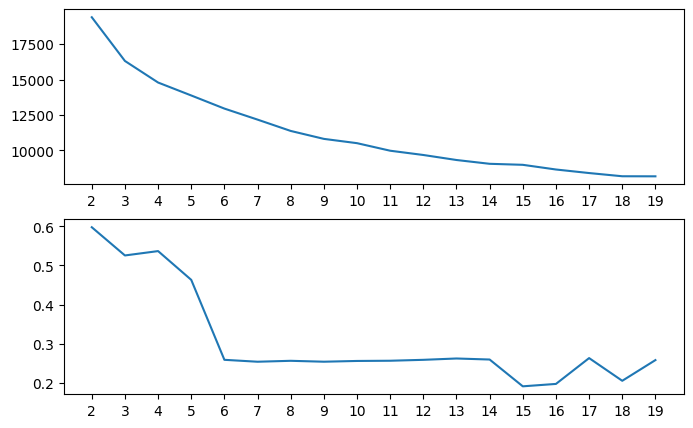

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(8,5))
axes[0].plot(ks, inertias)
axes[1].plot(ks, sil)
axes[0].set_xticks(ks)
axes[1].set_xticks(ks);
#looks like 6 clusters is a good number

In [ ]:
#reclustering with ideal number of clusters
kmeans = KMeans(n_clusters=6, max_iter=500)

In [ ]:
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=500, n_clusters=6)

In [ ]:
df['cluster'] = kmeans.labels_

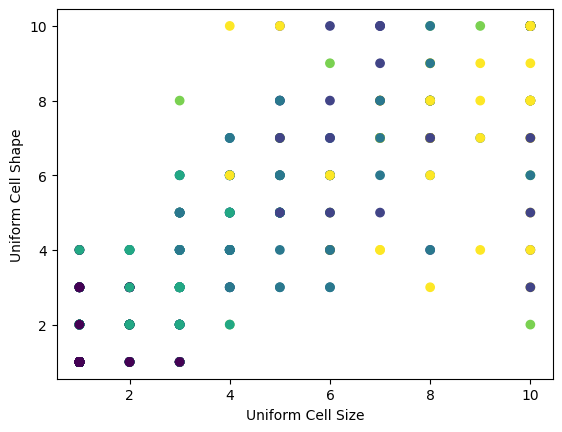

In [ ]:
plt.scatter(df['Uniform_Cell_Size'],df['Uniform_Cell_Shape'],c=df['cluster'])
plt.xlabel('Uniform Cell Size')
plt.ylabel('Uniform Cell Shape');

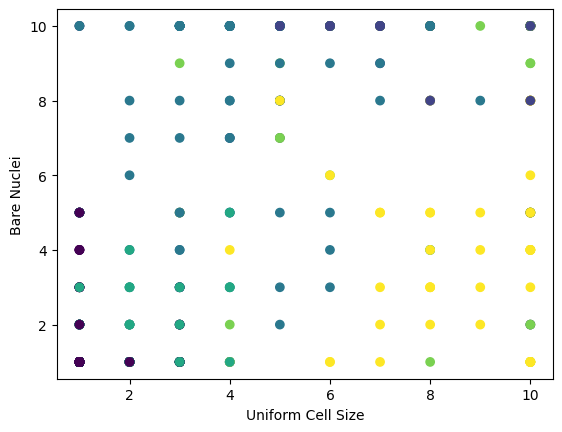

In [ ]:
plt.scatter(df['Uniform_Cell_Size'],df['Bare_Nuclei'],c=df['cluster'])
plt.xlabel('Uniform Cell Size')
plt.ylabel('Bare Nuclei');

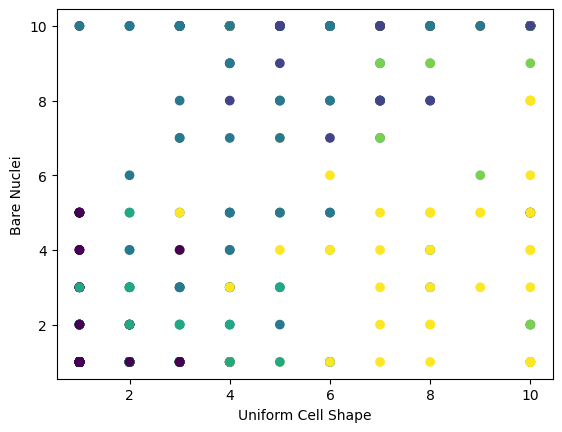

In [ ]:
plt.scatter(df['Uniform_Cell_Shape'],df['Bare_Nuclei'],c=df['cluster'])
plt.xlabel('Uniform Cell Shape')
plt.ylabel('Bare Nuclei');

In [ ]:
#scatterplots were not revealing so let's try a groupby and some other data viz to see if we can identify trends in clusters

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 92.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 62.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 52.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 37.5% of the points cannot be plac

<Axes: xlabel='Uniform_Cell_Shape', ylabel='Bare_Nuclei'>

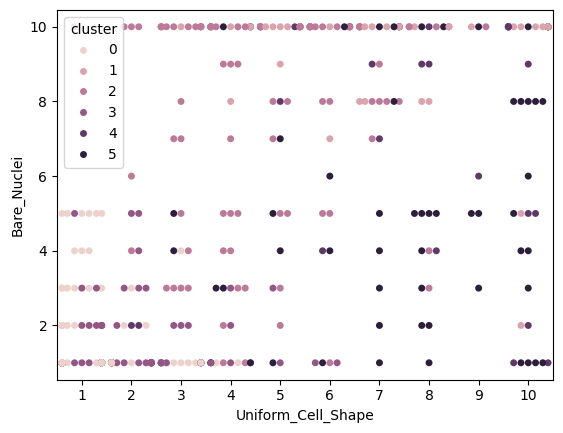

In [ ]:
sns.swarmplot(data=df, x='Uniform_Cell_Shape', y='Bare_Nuclei', hue='cluster')

<Axes: xlabel='Uniform_Cell_Shape', ylabel='Bare_Nuclei'>

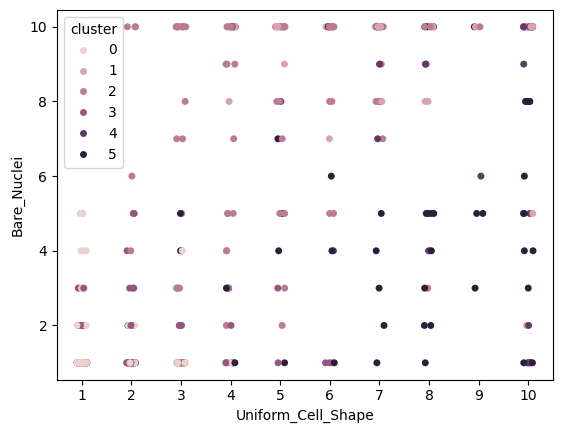

In [ ]:
sns.stripplot(data=df, x='Uniform_Cell_Shape', y='Bare_Nuclei', hue='cluster')

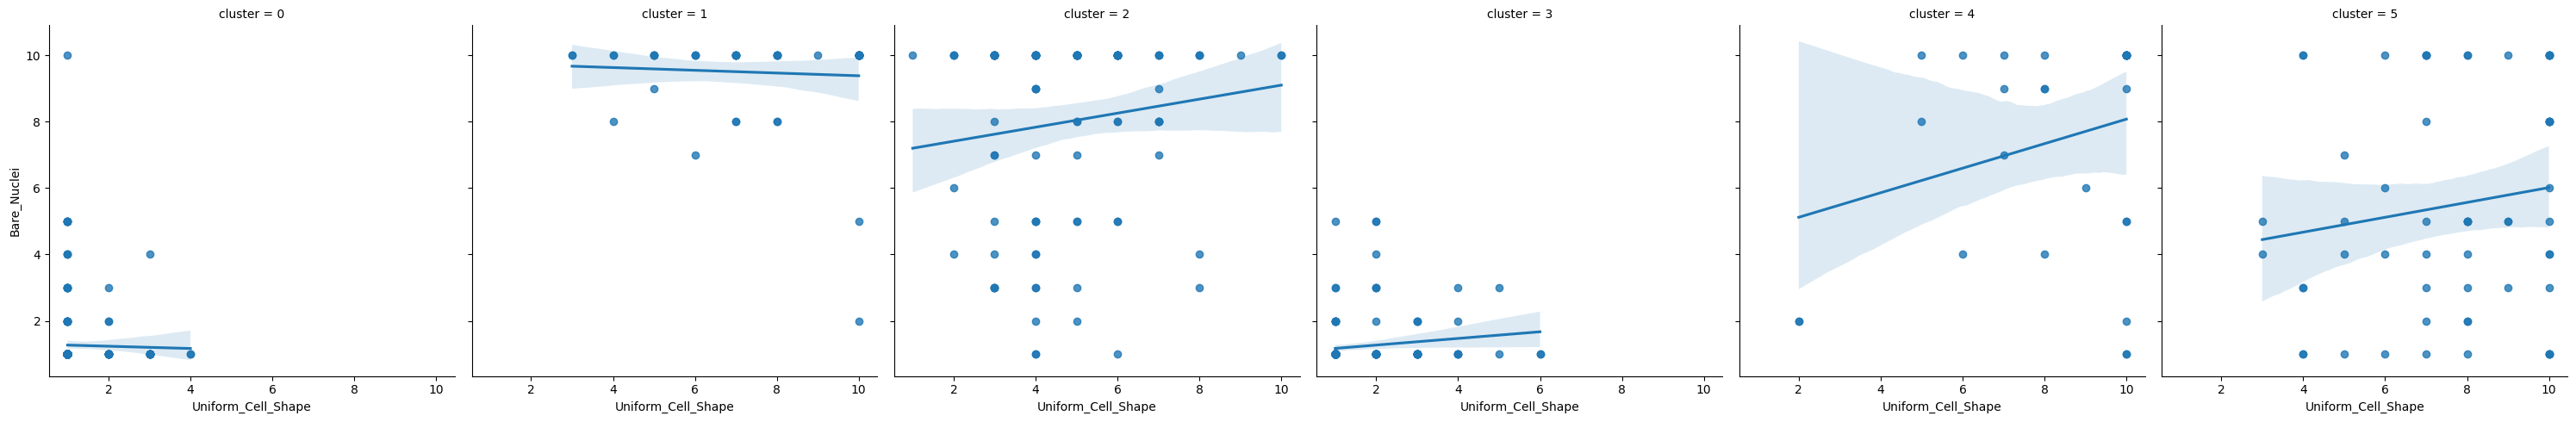

In [ ]:
sns.lmplot(data=df, x='Uniform_Cell_Shape', y='Bare_Nuclei', col='cluster');

In [ ]:
#clusters 0 and 4 appear to be the outliers

In [ ]:
clusters = df.groupby(['cluster']).mean().reset_index()

In [ ]:
clusters.value_counts()

cluster  MALIG     Clump_Thick  Uniform_Cell_Size  Uniform_Cell_Shape  Marginal_Adhes  Epit_Size  Bare_Nuclei  Bland_Chrom  Norm_Nucleoli  Mitoses 
0        0.000000  1.786260     1.118321           1.183206            1.141221        1.977099   1.263359     2.011450     1.064885       1.076336    1
1        1.000000  5.666667     7.843137           7.803922            8.568627        5.980392   9.470588     7.176471     7.529412       1.960784    1
2        0.923810  7.123810     4.457143           4.800000            4.161905        3.742857   8.000000     4.752381     3.876190       1.676190    1
3        0.005714  4.611429     1.405714           1.588571            1.560000        2.182857   1.228571     2.091429     1.394286       1.034286    1
4        1.000000  7.733333     8.300000           8.266667            7.133333        7.366667   7.433333     6.666667     7.766667       8.566667    1
5        1.000000  8.166667     8.266667           7.633333            4.550000        

In [ ]:
#groupby looks promising

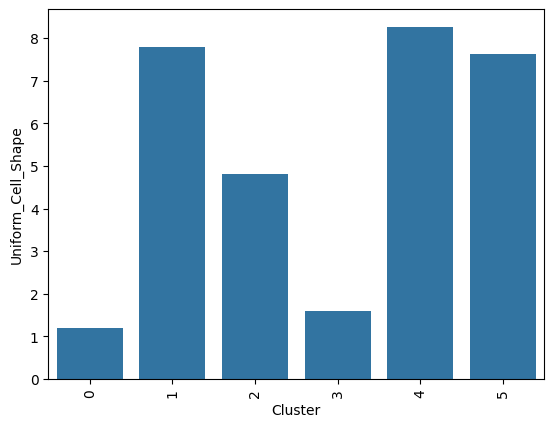

In [ ]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Uniform_Cell_Shape'])
plt.xticks(rotation=90)
plt.xlabel('Cluster');

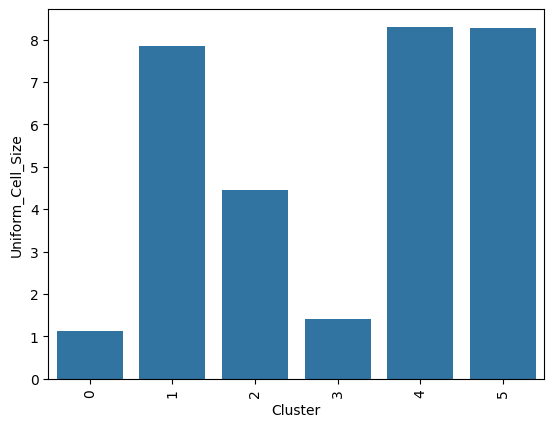

In [ ]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Uniform_Cell_Size'])
plt.xticks(rotation=90)
plt.xlabel('Cluster');

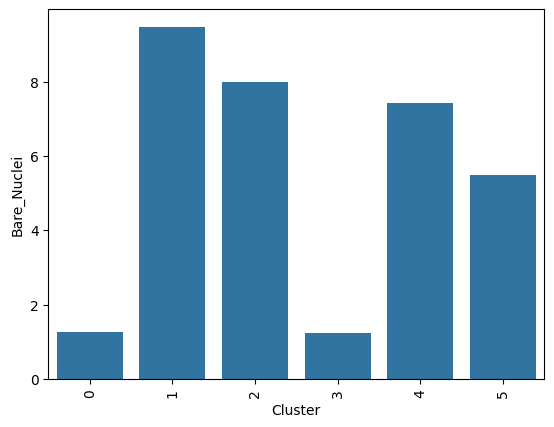

In [ ]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Bare_Nuclei'])
plt.xticks(rotation=90)
plt.xlabel('Cluster');

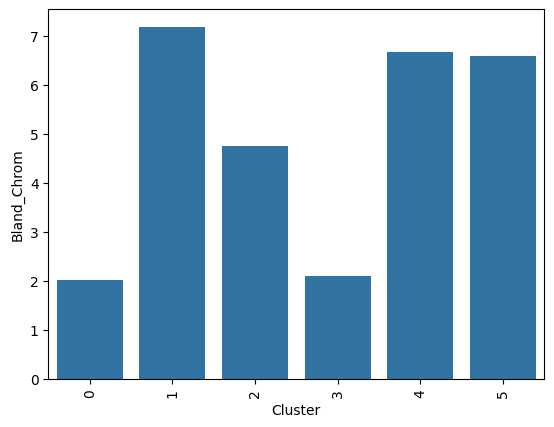

In [ ]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Bland_Chrom'])
plt.xticks(rotation=90)
plt.xlabel('Cluster');

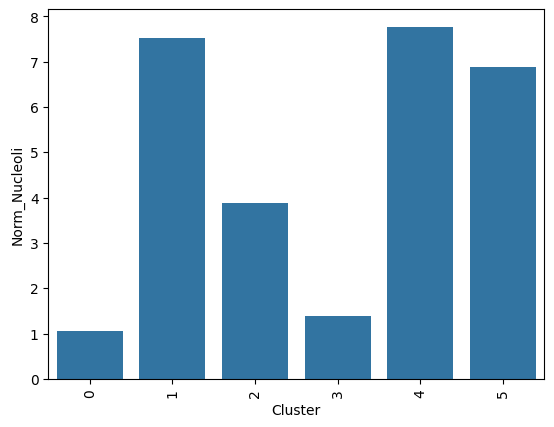

In [ ]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Norm_Nucleoli'])
plt.xticks(rotation=90)
plt.xlabel('Cluster');

In [ ]:
#trends area little clearer when visualizing a groupby in bar graphs

#**Beginning of Classification Modeling**

In [ ]:
#separating out target column
X = df[['Clump_Thick',
      'Uniform_Cell_Size',
      'Uniform_Cell_Shape',
      'Marginal_Adhes',
      'Epit_Size',
      'Bare_Nuclei',
      'Bland_Chrom',
      'Norm_Nucleoli',
      'Mitoses']]
y = df['MALIG']

In [ ]:
#splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#exploring train dataframe
X_train.shape

(512, 9)

In [ ]:
X_train.describe()

,Clump_Thick,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhes,Epit_Size,Bare_Nuclei,Bland_Chrom,Norm_Nucleoli,Mitoses
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,4.408203,3.123047,3.234375,2.800781,3.212891,3.500000,3.341797,2.769531,1.564453
std,2.784387,3.068446,3.054583,2.830391,2.200247,3.630702,2.363778,2.957231,1.637305
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.250000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_preds = rf.predict(X_test)

In [ ]:
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       103
           1       0.98      0.88      0.93        68

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
#very high f score without scaling. I'll try a boosted model as well with the goal of increasing recall of the positive class

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_preds = xgb.predict(X_test)

In [ ]:
print(classification_report(y_test,xgb_preds))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       103
           1       0.98      0.90      0.94        68

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
#boosted model showed slightly lower overall accuracy, and lower recall for the positive target class

In [ ]:
rf2 = RandomForestClassifier(n_estimators=500,max_depth=2)

In [ ]:
rf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=500)

In [ ]:
rf2_preds = rf2.predict(X_test)

In [ ]:
print(classification_report(y_test,rf2_preds))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       103
           1       0.97      0.91      0.94        68

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
#hypertuning resulted in higher recall of the positive class from reducing the max_depth

In [ ]:
xgb2 = XGBClassifier(n_estimators=500,max_depth=4)

In [ ]:
xgb2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb2_preds = xgb2.predict(X_test)

In [ ]:
print(classification_report(y_test,xgb2_preds))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       103
           1       0.98      0.90      0.94        68

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
#hypertuning had little effect on recall for a boosted model

In [ ]:
#adding back in clusters to see if that improves recall

In [ ]:
X2 = df[['Clump_Thick',
      'Uniform_Cell_Size',
      'Uniform_Cell_Shape',
      'Marginal_Adhes',
      'Epit_Size',
      'Bare_Nuclei',
      'Bland_Chrom',
      'Norm_Nucleoli',
      'Mitoses',
      'cluster']]
y2 = df['MALIG']

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42)

In [ ]:
rf3 = RandomForestClassifier(n_estimators=500,max_depth=3)

In [ ]:
rf3.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=3, n_estimators=500)

In [ ]:
rf3_preds = rf3.predict(X_test2)

In [ ]:
print(classification_report(y_test2, rf3_preds))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       103
           1       0.98      0.93      0.95        68

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [ ]:
#more accurate recall for the positive class

In [ ]:
rf4 = RandomForestClassifier(n_estimators=500, max_depth=3, class_weight='balanced')

In [ ]:
rf4.fit(X_train2,y_train2)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=500)

In [ ]:
rf4_preds = rf4.predict(X_test2)

In [ ]:
print(classification_report(y_test2, rf4_preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       103
           1       0.97      1.00      0.99        68

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [ ]:
#100% recall of the positive class